In [2]:
import cv2 as cv

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [7]:
(training_images,training_labels ),(testing_images,testing_labels)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 69s 0us/step


In [8]:
training_images,testing_images = training_images/255,testing_images/255

In [9]:
class_name = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

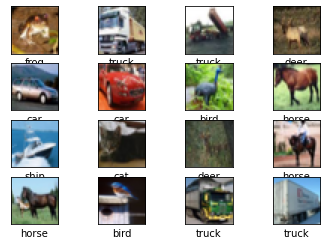

In [12]:
for i in range (16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_name[training_labels[i][0]])
    
    
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [20]:
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(training_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

Epoch 1/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5176 - accuracy: 0.4481 - val_loss: 1.2536 - val_accuracy: 0.5520
Epoch 2/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1650 - accuracy: 0.5867 - val_loss: 1.0790 - val_accuracy: 0.6162
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0170 - accuracy: 0.6408 - val_loss: 1.0117 - val_accuracy: 0.6412
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9260 - accuracy: 0.6741 - val_loss: 0.9479 - val_accuracy: 0.6623
Epoch 5/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8547 - accuracy: 0.7003 - val_loss: 0.8717 - val_accuracy: 0.6948
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7930 - accuracy: 0.7226 - val_loss: 0.9015 - val_accuracy: 0.6823
Epoch 7/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7512 - accuracy: 0.7374 - val_loss: 0.8242 -

In [25]:
model.save('images')

INFO:tensorflow:Assets written to: images\assets


In [35]:
img = cv.imread("img.jpg")


car


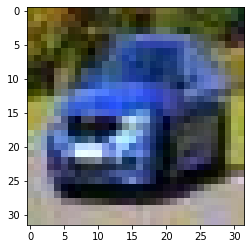

In [37]:

plt.imshow(img,cmap=plt.cm.binary)
predict = model.predict(np.array([img])/255)
index = np.argmax(predict)
print(class_name[index])